# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df= pd.read_csv('../../datasets/checker_submits.csv')


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.day_of_week
df = df.drop('timestamp',axis=1)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [4]:

one = OneHotEncoder(handle_unknown='ignore')
encode_data = one.fit_transform(df[['uid','labname']])

In [5]:
columns = one.get_feature_names_out(['uid','labname'])
encode_df = pd.DataFrame(encode_data.toarray(), columns=columns)
encode_df

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(df[['numTrials','hour']])

In [7]:
df = pd.concat([df.drop(['uid','labname'], axis=1), encode_df], axis=1)
df[['numTrials','hour']] = scale_data
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
df.to_csv('../../datasets/dayofweek.csv',index=False)

In [9]:
X= df.drop('dayofweek',axis=1)
y= df['dayofweek']

In [10]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X,y)
pred = dummy.predict(X)
accuracy_score(y,pred)


0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [11]:
logreg = LogisticRegression(random_state=21, fit_intercept=False)
logreg.fit(X,y)
pred = logreg.predict(X)
accuracy_score(y,pred)

0.6405693950177936

In [12]:
def ploting_coef(coef, features):
    importance = np.sum(np.abs(coef), axis=0)
    bardf = pd.DataFrame({'feature': features, 'coef': importance}).sort_values('coef',ascending=False).head(10)
    plt.barh(bardf['feature'], bardf['coef'])
    plt.title('Top 10 importamt features')
    plt.gca().invert_yaxis()
    plt.show()

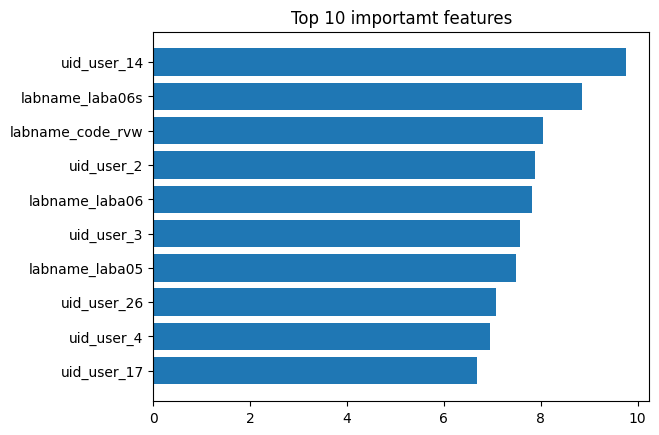

In [13]:
ploting_coef(logreg.coef_, X.columns)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [14]:
svc = SVC(kernel='linear',probability=True, random_state=21)
svc.fit(X,y)
pred = svc.predict(X)
accuracy_score(y,pred)

0.702846975088968

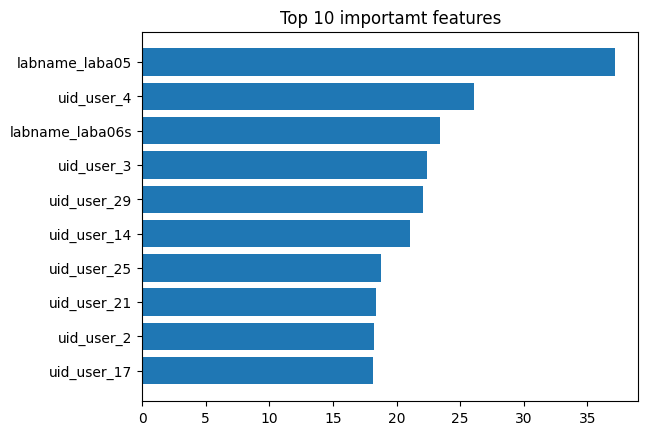

In [15]:
ploting_coef(svc.coef_,X.columns)

In [16]:
kernels = ['linear', 'poly', 'rbf','sigmoid']
for kernel in kernels:
    svc = SVC(kernel=kernel,probability=True, random_state=21)
    svc.fit(X,y)
    pred = svc.predict(X)
    acc = accuracy_score(y,pred)
    print(f'{kernel} : {acc}')

linear : 0.702846975088968
poly : 0.8594306049822064
rbf : 0.8558718861209964
sigmoid : 0.3997627520759193


### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [17]:
dt = DecisionTreeClassifier(max_depth=4,random_state=21)
dt.fit(X,y)
pred = dt.predict(X)
accuracy_score(y,pred)

0.5516014234875445

In [18]:
dt9 = DecisionTreeClassifier(max_depth=9,random_state=21)
dt9.fit(X,y)
pred = dt9.predict(X)
accuracy_score(y,pred)

0.7846975088967971

In [19]:
dt15 = DecisionTreeClassifier(max_depth=15,random_state=21)
dt15.fit(X,y)
pred = dt15.predict(X)
accuracy_score(y,pred)

0.9460260972716489

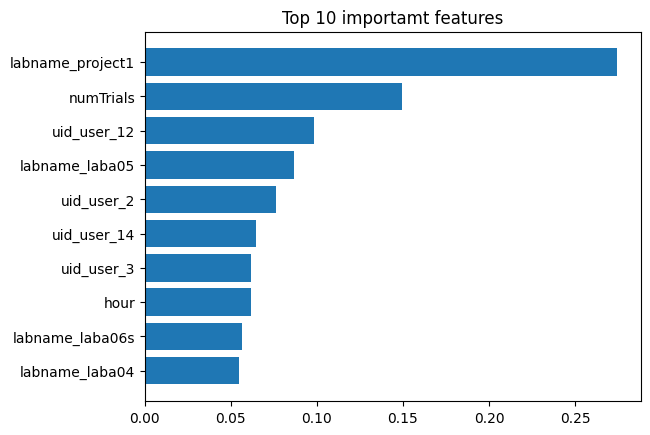

In [20]:
importance = dt.feature_importances_
bardf = pd.DataFrame({'feature': X.columns, 'coef': importance}).sort_values('coef',ascending=False).head(10)
plt.barh(bardf['feature'], bardf['coef'])
plt.title('Top 10 importamt features')
plt.gca().invert_yaxis()
plt.show()

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [27]:
rf = RandomForestClassifier(n_estimators=100,max_depth=25,random_state=21)
rf.fit(X,y)
pred = rf.predict(X)
accuracy_score(y,pred)

1.0

In [28]:
rf2 = RandomForestClassifier(n_estimators=50,max_depth=10,random_state=21)
rf2.fit(X,y)
pred = rf2.predict(X)
accuracy_score(y,pred)

0.8701067615658363

In [29]:
rf2 = RandomForestClassifier(n_estimators=200,max_depth=15,random_state=21)
rf2.fit(X,y)
pred = rf2.predict(X)
accuracy_score(y,pred)

0.9792408066429419

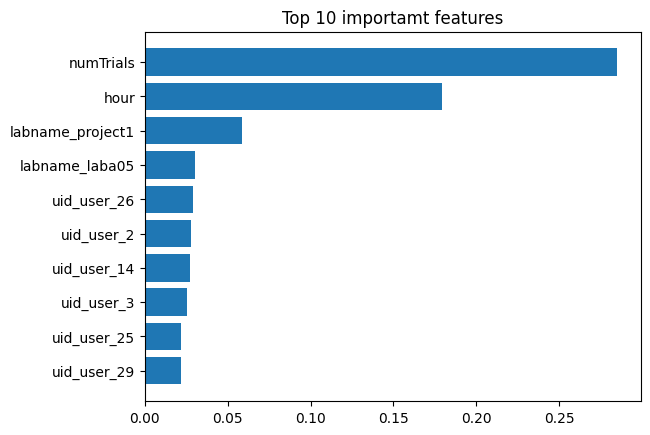

In [33]:
importance = rf.feature_importances_
bardf = pd.DataFrame({'feature': X.columns, 'coef': importance}).sort_values('coef',ascending=False).head(10)
plt.barh(bardf['feature'], bardf['coef'])
plt.title('Top 10 importamt features')
plt.gca().invert_yaxis()
plt.show()